In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

c_cycle=("#ea5415","#005192","#ffdf00","#1d7a21","#88593b","#737061")

class vec3d:
    def __init__(self, x,y,z):
        self.x = x
        self.y = y
        self.z = z

class planet:
    def __init__(self, position, mass, velocity, name = ""):
        self.position = position
        self.mass     = mass
        self.velocity = velocity
        self.name     = name


In [2]:
#planet data (position (m), mass (kg), velocity (m/s)
sun     = {"position":vec3d(0,0,0),            "mass":1.9891e30, "velocity":vec3d(0,0,0)}
mercury = {"position":vec3d(0,5.791e10,0),     "mass":3.301e23,  "velocity":vec3d(478725,0,0)}
venus   = {"position":vec3d(0,1.0820893e11,0), "mass":4.869e24,  "velocity":vec3d(35021.4,0,0)}
earth   = {"position":vec3d(0,1.4959787e11,0), "mass":5.972e24,  "velocity":vec3d(29780,0,0)}
mars    = {"position":vec3d(0,2.2793664e11,0), "mass":6.4191e23, "velocity":vec3d(24131,0,0)}
mars2   = {"position":vec3d(0,2.2793664e11,0), "mass":6.4191e23, "velocity":vec3d(24131*np.cos(1.8497*np.pi/180.0),0,24131*np.sin(1.8497*np.pi/180.0))}
jupiter = {"position":vec3d(0,7.78412e11,0),   "mass":1.8986e27, "velocity":vec3d(13070,0,0)}
saturn  = {"position":vec3d(0,1.4267254e12,0), "mass":5.688e26,  "velocity":vec3d(9672,0,0)}
uranus  = {"position":vec3d(0,2.87099e12,0),   "mass":8.686e25,  "velocity":vec3d(6835,0,0)}
neptune = {"position":vec3d(0,4.49506e12,0),   "mass":1.02e26,   "velocity":vec3d(5477,0,0)}
pluto   = {"position":vec3d(0,3.7e12,0),       "mass":1.3e22,    "velocity":vec3d(4748,0,0)}

solar_system = [
    planet( position = sun["position"],     mass = sun["mass"],     velocity = sun["velocity"],     name = "sun"),
    planet( position = earth["position"],   mass = earth["mass"],   velocity = earth["velocity"],   name = "earth"),
    planet( position = mars["position"],    mass = mars["mass"],    velocity = mars["velocity"],    name = "mars"),
    planet( position = venus["position"],   mass = venus["mass"],   velocity = venus["velocity"],   name = "venus"),
    planet( position = jupiter["position"], mass = jupiter["mass"], velocity = jupiter["velocity"], name = "jupiter"),
    planet( position = saturn["position"],  mass = saturn["mass"],  velocity = saturn["velocity"],  name = "saturn"),
    ]


In [3]:
def calculate_acceleration(solar_system, target_index):
    G_const = 6.67408e-11 #m3 kg-1 s-2
    acceleration = vec3d(0,0,0)
    target = solar_system[target_index]
    for index, external in enumerate(solar_system):
        if index != target_index:
            r = (target.position.x - external.position.x)**2 + (target.position.y - external.position.y)**2 + (target.position.z - external.position.z)**2
            r = np.sqrt(r)
            coef = G_const * external.mass / r**3
            acceleration.x += coef * (external.position.x - target.position.x)
            acceleration.y += coef * (external.position.y - target.position.y)
            acceleration.z += coef * (external.position.z - target.position.z)

    return acceleration
def solve_equation_of_motion(solar_system, dt =1):
    for index, target in enumerate(solar_system):
        acceleration = calculate_acceleration(solar_system, index)
        target.position.x += target.velocity.x * dt + 0.5 * acceleration.x * dt**2
        target.position.y += target.velocity.y * dt + 0.5 * acceleration.y * dt**2
        target.position.z += target.velocity.z * dt + 0.5 * acceleration.z * dt**2

        acceleration_new = calculate_acceleration(solar_system, index)
        target.velocity.x += 0.5 * (acceleration.x + acceleration_new.x) * dt
        target.velocity.y += 0.5 * (acceleration.y + acceleration_new.y) * dt
        target.velocity.z += 0.5 * (acceleration.z + acceleration_new.z) * dt


In [4]:
def simulation(solar_system, dt = 1, number_of_steps = 10000, report_freq = 100):
    trajectories = []
    for current in solar_system:
        trajectories.append({"x":[], "y":[], "z":[], "name":current.name})

    for i in range(1,number_of_steps+1):
        solve_equation_of_motion(solar_system, dt)            

        if i % report_freq == 0:
            for index, trajectory in enumerate(trajectories):
                trajectory["x"].append(solar_system[index].position.x)
                trajectory["y"].append(solar_system[index].position.y)           
                trajectory["z"].append(solar_system[index].position.z)       

    return trajectories


In [5]:
def plot_output(solar_system, outfile = None):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    max_range = 0
    for current in solar_system: 
        temp = max(max(current["x"]), max(current["y"]), max(current["z"]))
        if temp > max_range:
            max_range = temp
        ax.plot(current["x"], current["y"], current["z"], label = current["name"])        

    ax.set_xlim([-max_range, max_range])    
    ax.set_ylim([-max_range, max_range])
    ax.set_zlim([-max_range, max_range])
    ax.legend(loc='best')        

    if outfile:
        plt.savefig(outfile)
    else:
        plt.show()  


In [6]:
def calculate_distance(src_trajectory, dst_trajectory):
    distance = []
    for t in range(len(src_trajectory[0])):
        r = (src_trajectory[0][t] - dst_trajectory[0][t])**2 + (src_trajectory[1][t] - dst_trajectory[1][t])**2 + (src_trajectory[2][t] - dst_trajectory[2][t])**2
        distance.append(np.sqrt(r))
    return distance

def get_planet_index(solar_system, name):
    for index, target in enumerate(solar_system):
        if target.name==name:
            return index

def plot_distance(trajectories, solar_system, src='earth', dst=None):
    src_index = get_planet_index(solar_system, src)
    src_trajectory = [ trajectories[src_index]['x'], trajectories[src_index]['y'], trajectories[src_index]['z'] ]
    time = np.arange(0, len(src_trajectory[0]))

    distance = []
    labels = []
    if dst==None:
        for index, trajectory in enumerate(trajectories):
            if index!=src_index:
                name    = trajectories[index]['name']
                pos_trajectory = [ trajectories[index]['x'], trajectories[index]['y'], trajectories[index]['z'] ]
                labels.append(src+'-'+name)
                d = calculate_distance(pos_trajectory, src_trajectory)
                distance.append(d)
    else:
        dst_index = get_planet_index(solar_system, dst)
        pos_trajectory = [ trajectories[dst_index]['x'], trajectories[dst_index]['y'], trajectories[dst_index]['z'] ]
        d = calculate_distance(src_trajectory, pos_trajectory)
        distance.append(d)
        labels.append(src+'-'+dst)

    plt.rcParams['figure.figsize'] = 18,9
    plt.rcParams["font.size"] = 16
    for k in range(len(labels)):
        plt.plot(time, distance[k], label=labels[k], color=c_cycle[k])
    plt.xlabel('time [day]')
    plt.ylabel('distance [km]')
    plt.legend(loc='upper left')
    return distance


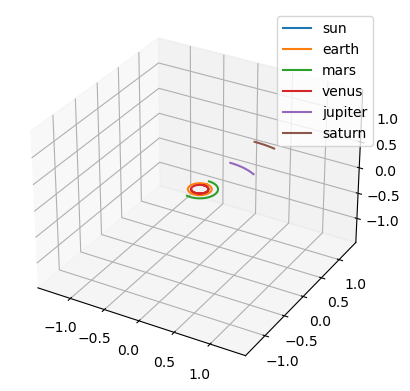

In [7]:
trajectories = simulation(solar_system, dt = 175.5, number_of_steps = 365*500, report_freq = 500) 
d1 = plot_output(trajectories)
